In [5]:
import numpy as np
import pandas as pd

In [2]:
class Perceptron(object):
  def __init__(self, lr = 0.01, iterations = 50, random_state = 1):
    self.lr = lr
    self.iterations = iterations
    self.random_state = random_state

  def fit(self, X, y):
    gen = np.random.RandomState(self.random_state)
    self.w_ = gen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.iterations):
      errors = 0
      for i, target in zip(X,y):
        update = self.lr *( target - self.predict(i))
        self.w_[1:] += update * i
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [3]:
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [15]:
# training perceptron on iris df
from sklearn import datasets

In [16]:
iris = datasets.load_iris()

In [18]:
from pandas.core.frame import DataFrame
df = DataFrame(iris.data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
df['class'] = iris.target

In [20]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [22]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
X = df.iloc[:, 0:4].values

In [31]:
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt

In [26]:
y = df.iloc[:, 4].values

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

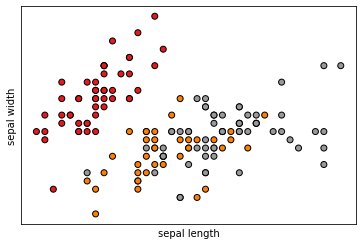

In [36]:
# plot data

plt.scatter(X[:,0], X[:,1], c=y, cmap= plt.cm.Set1, edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

[]

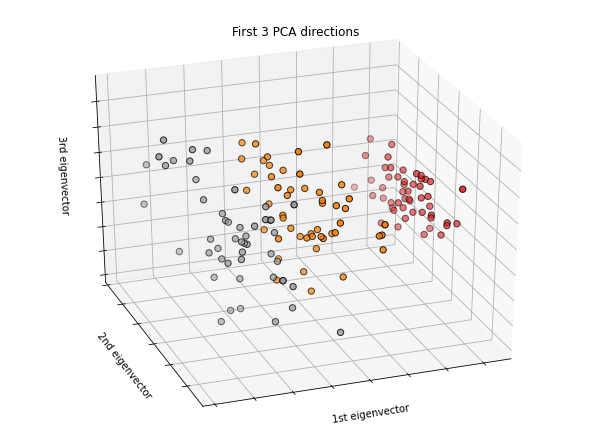

In [38]:
fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev = -150, azim = 110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=y, cmap = plt.cm.Set1, edgecolor='k', s=40)
ax.set_title('First 3 PCA directions')
ax.set_xlabel('1st eigenvector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

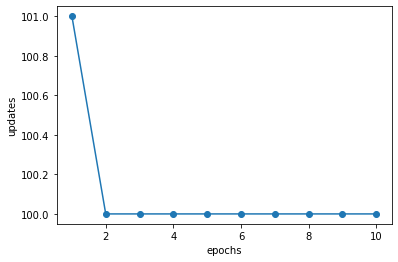

In [47]:
# training perseptron model

PNN = Perceptron(lr =0.1, iterations=10)
PNN.fit(X, y)

plt.plot(range(1, len(PNN.errors_) + 1), PNN.errors_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('updates')

plt.show()